<a href="https://colab.research.google.com/github/AnuragDingar/cloths_classification/blob/master/Overfit_and_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow==2.0.0
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
NUM_WORDS = 10000

(train_data , train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = NUM_WORDS)

def multi_hot_sequences (sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension= NUM_WORDS)
test_data =  multi_hot_sequences(test_data, dimension= NUM_WORDS) 


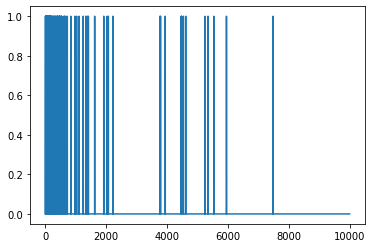

In [0]:
plt.plot(train_data[0])

In [0]:
# creating a base line model

baseline_model = keras.Sequential([
                                   keras.layers.Dense(16, activation = 'relu',input_shape=(NUM_WORDS,)),
                                   keras.layers.Dense(16, activation='relu'),
                                   keras.layers.Dense(1, activation= 'sigmoid')

])
baseline_model.compile(optimizer= 'adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size= 512,
                                      validation_data = (test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5324 - accuracy: 0.7445 - binary_crossentropy: 0.5324 - val_loss: 0.3908 - val_accuracy: 0.8708 - val_binary_crossentropy: 0.3908
Epoch 2/20
25000/25000 - 3s - loss: 0.2788 - accuracy: 0.9096 - binary_crossentropy: 0.2788 - val_loss: 0.2980 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2980
Epoch 3/20
25000/25000 - 3s - loss: 0.1920 - accuracy: 0.9356 - binary_crossentropy: 0.1920 - val_loss: 0.3033 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.3033
Epoch 4/20
25000/25000 - 3s - loss: 0.1507 - accuracy: 0.9510 - binary_crossentropy: 0.1507 - val_loss: 0.3120 - val_accuracy: 0.8795 - val_binary_crossentropy: 0.3120
Epoch 5/20
25000/25000 - 3s - loss: 0.1228 - accuracy: 0.9622 - binary_crossentropy: 0.1228 - val_loss: 0.3353 - val_accuracy: 0.8762 - val_binary_crossentropy: 0.3353
Epoch 6/20
25000/25000 - 3s - loss: 0.1021 - accuracy: 0.9699 - binary_crossentropy: 0.1021 - val_loss: 0.3669

In [0]:
# create a smaller model

smaller_model = keras.Sequential([
                                   keras.layers.Dense(4, activation = 'relu',input_shape=(NUM_WORDS,)),
                                   keras.layers.Dense(4, activation='relu'),
                                   keras.layers.Dense(1, activation= 'sigmoid')

])
smaller_model.compile(optimizer= 'adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history = smaller_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size= 512,
                                      validation_data = (test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5925 - accuracy: 0.7452 - binary_crossentropy: 0.5925 - val_loss: 0.4889 - val_accuracy: 0.8330 - val_binary_crossentropy: 0.4889
Epoch 2/20
25000/25000 - 3s - loss: 0.3852 - accuracy: 0.8886 - binary_crossentropy: 0.3852 - val_loss: 0.3575 - val_accuracy: 0.8772 - val_binary_crossentropy: 0.3575
Epoch 3/20
25000/25000 - 3s - loss: 0.2815 - accuracy: 0.9129 - binary_crossentropy: 0.2815 - val_loss: 0.3081 - val_accuracy: 0.8860 - val_binary_crossentropy: 0.3081
Epoch 4/20
25000/25000 - 3s - loss: 0.2295 - accuracy: 0.9268 - binary_crossentropy: 0.2295 - val_loss: 0.2899 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2899
Epoch 5/20
25000/25000 - 3s - loss: 0.1972 - accuracy: 0.9354 - binary_crossentropy: 0.1972 - val_loss: 0.2834 - val_accuracy: 0.8885 - val_binary_crossentropy: 0.2834
Epoch 6/20
25000/25000 - 3s - loss: 0.1737 - accuracy: 0.9427 - binary_crossentropy: 0.1737 - val_loss: 0.2844

In [0]:
# create  a bigger model

bigger_model = keras.models.Sequential([
                                   keras.layers.Dense(512, activation = 'relu',input_shape=(NUM_WORDS,)),
                                   keras.layers.Dense(512, activation='relu'),
                                   keras.layers.Dense(1, activation= 'sigmoid')

])
bigger_model.compile(optimizer= 'adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size= 512,
                                      validation_data = (test_data, test_labels),
                                      verbose=2)

25000/25000 - 19s - loss: 0.3497 - accuracy: 0.8508 - binary_crossentropy: 0.3497 - val_loss: 0.2949 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.2949
Epoch 2/20
25000/25000 - 18s - loss: 0.1443 - accuracy: 0.9471 - binary_crossentropy: 0.1443 - val_loss: 0.3336 - val_accuracy: 0.8725 - val_binary_crossentropy: 0.3336
Epoch 3/20
25000/25000 - 18s - loss: 0.0515 - accuracy: 0.9854 - binary_crossentropy: 0.0515 - val_loss: 0.4369 - val_accuracy: 0.8685 - val_binary_crossentropy: 0.4369
Epoch 4/20
25000/25000 - 18s - loss: 0.0086 - accuracy: 0.9989 - binary_crossentropy: 0.0086 - val_loss: 0.5621 - val_accuracy: 0.8696 - val_binary_crossentropy: 0.5621
Epoch 5/20
25000/25000 - 18s - loss: 0.0012 - accuracy: 1.0000 - binary_crossentropy: 0.0012 - val_loss: 0.6634 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.6634
Epoch 6/20
25000/25000 - 18s - loss: 8.5974e-04 - accuracy: 1.0000 - binary_crossentropy: 8.5974e-04 - val_loss: 0.6994 - val_accuracy: 0.8702 - val_binary_crossentro

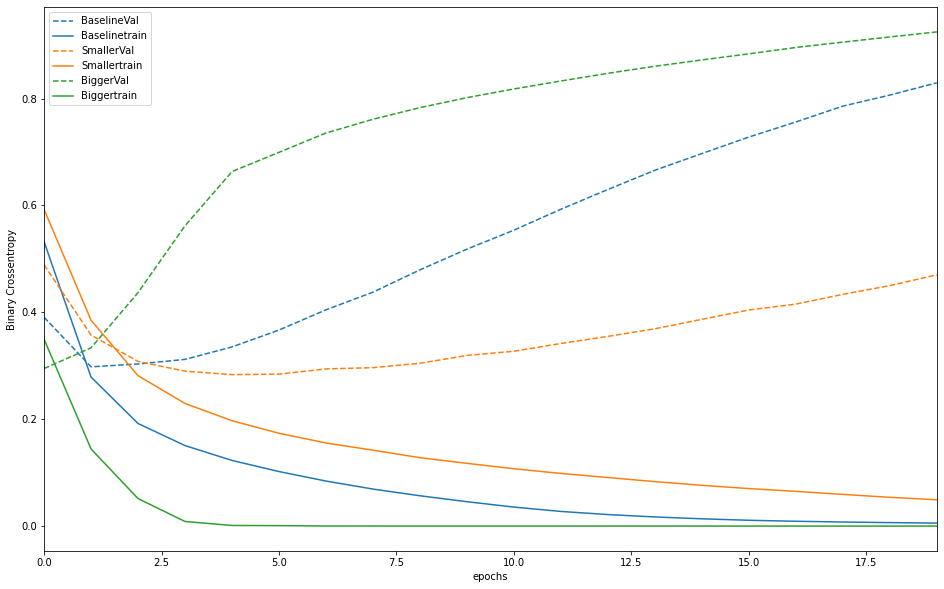

In [0]:
# plot training and vallidation loss
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+'Val')
    plt.plot(history.epoch, history.history[key], color= val[0].get_color(),
             label= name.title()+'train')
    
  plt.xlabel('epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)] )

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger' , bigger_history)])  

In [0]:
# regularization

l2_model = keras.models.Sequential([
                                    keras.layers.Dense(16,kernel_regularizer= keras.regularizers.l2(0.001),
                                                       activation = 'relu', input_shape=(NUM_WORDS,)),
                                    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                                                       activation= 'relu'),
                                    keras.layers.Dense(1, activation= 'sigmoid')                                        
])

l2_model.compile(optimizer = 'adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5414 - accuracy: 0.8008 - binary_crossentropy: 0.5018 - val_loss: 0.3829 - val_accuracy: 0.8751 - val_binary_crossentropy: 0.3410
Epoch 2/20
25000/25000 - 3s - loss: 0.3062 - accuracy: 0.9062 - binary_crossentropy: 0.2597 - val_loss: 0.3343 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2845
Epoch 3/20
25000/25000 - 3s - loss: 0.2548 - accuracy: 0.9290 - binary_crossentropy: 0.2022 - val_loss: 0.3377 - val_accuracy: 0.8862 - val_binary_crossentropy: 0.2832
Epoch 4/20
25000/25000 - 3s - loss: 0.2311 - accuracy: 0.9401 - binary_crossentropy: 0.1749 - val_loss: 0.3494 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.2920
Epoch 5/20
25000/25000 - 3s - loss: 0.2181 - accuracy: 0.9455 - binary_crossentropy: 0.1596 - val_loss: 0.3669 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3075
Epoch 6/20
25000/25000 - 3s - loss: 0.2067 - accuracy: 0.9512 - binary_crossentropy: 0.1461 - val_loss: 0.3759

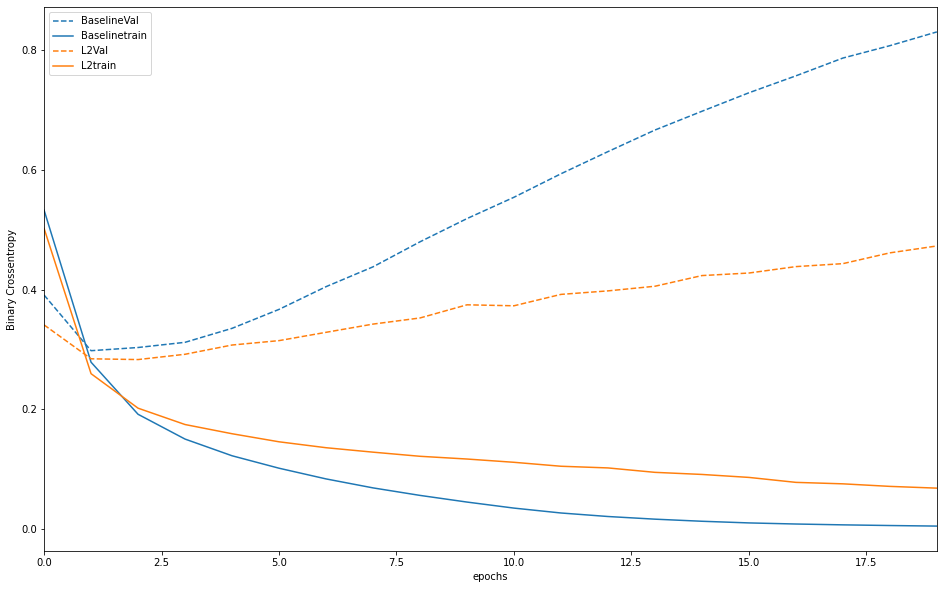

In [0]:
plot_history([('baseline', baseline_history),
              ('l2',l2_model_history)])

In [0]:
#Dropout

dpt_model = keras.models.Sequential([
                                    keras.layers.Dense(16,activation='relu', input_shape= (NUM_WORDS,)),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(16, activation= 'relu'),
                                    keras.layers.Dropout(0.5),
                                    keras.layers.Dense(1,activation='sigmoid')

])
dpt_model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data= (test_data , test_labels),
                                  verbose=2
                                  )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6336 - accuracy: 0.6383 - binary_crossentropy: 0.6336 - val_loss: 0.5121 - val_accuracy: 0.8452 - val_binary_crossentropy: 0.5121
Epoch 2/20
25000/25000 - 3s - loss: 0.4805 - accuracy: 0.8012 - binary_crossentropy: 0.4805 - val_loss: 0.3681 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.3681
Epoch 3/20
25000/25000 - 3s - loss: 0.3674 - accuracy: 0.8723 - binary_crossentropy: 0.3674 - val_loss: 0.3051 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.3051
Epoch 4/20
25000/25000 - 3s - loss: 0.3013 - accuracy: 0.8988 - binary_crossentropy: 0.3013 - val_loss: 0.2867 - val_accuracy: 0.8872 - val_binary_crossentropy: 0.2867
Epoch 5/20
25000/25000 - 3s - loss: 0.2561 - accuracy: 0.9139 - binary_crossentropy: 0.2561 - val_loss: 0.2887 - val_accuracy: 0.8851 - val_binary_crossentropy: 0.2887
Epoch 6/20
25000/25000 - 3s - loss: 0.2258 - accuracy: 0.9233 - binary_crossentropy: 0.2258 - val_loss: 0.2889

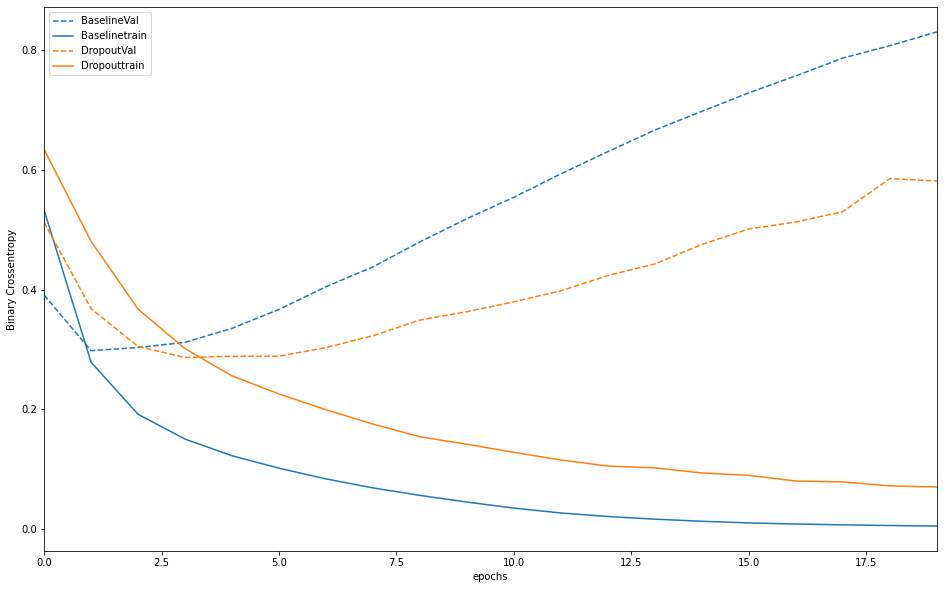

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])